In [82]:
import base64
import datetime
import matplotlib.pyplot as plt

In [19]:
s=b'sdf'

In [20]:
 a = base64.b64encode(s)

In [21]:
a

b'c2Rm'

In [62]:
print(datetime.datetime.now())

2019-04-25 15:03:44.906637


# 第一个包

In [84]:
import numpy as np

In [ ]:
strEncoded=b'AAAAAAAEAAUABwAHAAIABQAFAAQAAgABAAMABgAFAAYABQAFAAYABwADAAMAAQADAAIAAgADAAMAAgAFAAIAAQAFAAQAAgADAAUABAABAAEAAgADAAIABAAGAAUABgABAAEAAwADAAEAAAABA8gBAAQAAwAAAAEAAQACAAUAAwABAAIAAgAEAAYACAAGAAIAAgABAAMABAAJAAQAAwADAAYACAADAAgABgAEAAMAAQAEAAEAAgADAAkACgAIAAEABAACAAMAAQABAAgACAADAAYABgAHAAMABwAAAAcADAAHAAUABwAHAAgAAQABAAAABwAIAAwACAAEAAYACgAIAAAACAAHAAQAAQAHAAgACAAFAAMABQALAAoAAQAFAAIAAgAGAAkABgADAAoACQALAAMAAgAAAAEDyAIACgARAAQAAwAJAAwADAACAAwAEwARAAcADwADAA0ACwAUAAUACAALAAIADQAFABUABgAJABMAEwALAAYAAAAEAAgAAgAPAAYABgAKAAQAEAAFAA8ACAADAAgAEQANABoADAAZABEACgADABAACgAHAAsAAQAJAAMACwALAAkADAANAAwACgAUABQABQARAA4ABgAEABkADgAGAA4ADQAWAAcAEgAEAB0AGAALABQACQAUAA4ACgAPAA0AEAAIAAIABwATAAAA=='


In [152]:
strEncoded=b'AQPIAAYCAAZABC0EKAHGAAAAAQABAAEAAAAAAAAAAQAAAAAAAQAAAAEAAQAAAAAAAQAAAAAAAAABAAIAAQAAAAEAAQABAAEAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAEAAQABAAAAAAABAAEAAAABAAAAAAAAAAAAAAAAAAAAAAABAAEAAQABAAAAAAAAAAEAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAQAAAAEAAAABAAAAAQABAAAAAAABAAEAAAAAAAAAAQAAAAABA8gBAAAAAAAAAgABAAAAAAABAAAAAQAAAAEAAAAAAAMAAAAAAAEAAQAAAAAAAgABAAEAAQACAAEAAwABAAIAAgACAAQABAAAAAwC5wWrAfsACAAAAAQAAgACAAIAAQADAAIAAwABAAIAAAABAAIAAAAAAAIAAgABAAIAAQABAAMAAgAAAAEAAgACAAAAAQADAAMAAQABAAIAAAABAAEAAQACAAEAAgABAAMAAQACAAEAAQACAAMAAwAAAAEAAgABAAAAAgABAAIAAAEDyAIAAAEAAwACAAkACAACAAEAAgABAAEAAwACAAIABAADAAQAAwACAAIAAAADAAIABAADAAIAAgABAAIAAQADAAYAAgACAAMABAADAAIAAwAAAAIAAQAEAAUACAAFABIAGAAGAAMABQABAAQABAADAAYABAAIAAUAAwAGAAYAAQAGAAIAAQAFAAYABAApAEcAFQAHAAgABgAFAAQAAQAGAAMABAAHAAgABwAFAAQABAAFAAUABQAEAAMACAAJAAUAAwACAAQABAAA=='

2019-04-30 10:43:50.193097


Package: 0
Address: 1
Code: 3
Size: 200
Serial Number: 0
Header Length: 6
Points: 512
Sample Rate: 1600
Axis ID: 4
Sequence: 45


Package: 1
Address: 1
Code: 3
Size: 200
Serial Number: 1
Header Length: 0


Package: 2
Address: 1
Code: 3
Size: 200
Serial Number: 2
Header Length: 0




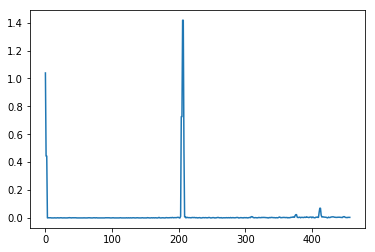

In [153]:
strDecoded=base64.b64decode(strEncoded)
len(strDecoded)

offset=0
print(datetime.datetime.now())
print('\n')
data=[]
for i in range(0,3):
    print("Package: "+str(i))
    print("Address: "+ str(  struct.unpack("B",strDecoded[offset+0:offset+1])[0]    ))
    print("Code: "+ str(  struct.unpack("B",strDecoded[offset+1:offset+2])[0]    ))
    size=struct.unpack("B",strDecoded[offset+2:offset+3])[0]
    print("Size: "+ str(  struct.unpack("B",strDecoded[offset+2:offset+3])[0]    ))
    print("Serial Number: "+ str(  struct.unpack("B",strDecoded[offset+3:offset+4])[0]    ))
    print("Header Length: "+ str(  struct.unpack("B",strDecoded[offset+4:offset+5])[0]    ))
    offset_old=offset+5
    if 0==i:
        
        print("Points: "+ str(  struct.unpack(">H",strDecoded[offset+5:offset+7])[0]    ))
        print("Sample Rate: "+ str(  struct.unpack(">H",strDecoded[offset+7:offset+9])[0]    ))
        print("Axis ID: "+ str(  struct.unpack("B",strDecoded[offset+9:offset+10])[0]    ))
        print("Sequence: "+ str(  struct.unpack("B",strDecoded[offset+10:offset+11])[0]    ))
        offset_old=offset+11
    
    offset+=3+size
    j=offset_old
    while j<offset:
        
        #print(j)
        try:
            byte16=struct.unpack(">H",strDecoded[j:j+2])[0]
        except:
            print(j)
        j+=2
        data.append(byte16)
    print('\n')
#plt.plot(np.arange(0,len(data)),np.array(data))
data=np.array(data)/1024
f=[]
f_max=np.int32(len(data)*800/512)
for j in range(0,f_max-1):
    X=j*512*2/1600
    
    result= data[np.int(np.round(X))]
    #print(str(X )+' '+str(result))
    f.append( result)
plt.plot(np.arange(0,len(f)),np.array(f))
plt.show()

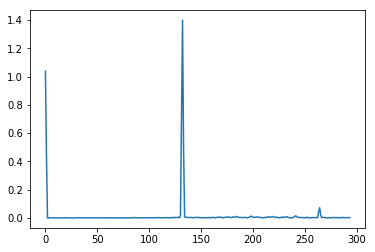

In [151]:
plt.plot(np.arange(0,len(data)),np.array(data))
plt.show()

In [144]:
ma=[0, 0, 0, 0, 0, 0.01, 0.007, 0.007, 0.005, 0.007, 0.006, 0.005, 0.005, 0.004, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.005, 0.004, 0.004, 0.005, 0.004, 0.004, 0.005, 0.004, 0.005, 0.005, 0.004, 0.005, 0.005, 0.005, 0.004, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.006, 0.006, 0.007, 0.007, 0.009, 0.013, 0.018, 0.012, 0.003, 0.008, 0.006, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.008, 0.008, 0.008, 0.008, 0.008, 0.01, 0.009, 0.009, 0.01, 0.01, 0.01, 0.01, 0.011, 0.011, 0.012, 0.012, 0.013, 0.014, 0.014, 0.015, 0.016, 0.017, 0.018, 0.018, 0.02, 0.021, 0.023, 0.025, 0.026, 0.029, 0.032, 0.036, 0.041, 0.045, 0.054, 0.063, 0.078, 0.112, 0.142, 0.288, 0.649, 0.785, 0.174, 0.138, 0.094, 0.078, 0.067, 0.054, 0.049, 0.042, 0.038, 0.035, 0.032, 0.03, 0.027, 0.025, 0.024, 0.023, 0.022, 0.02, 0.02, 0.019, 0.018, 0.018, 0.017, 0.016, 0.016, 0.015, 0.014, 0.014, 0.014, 0.013, 0.013, 0.012, 0.012, 0.013, 0.013, 0.011, 0.012, 0.011, 0.011, 0.011, 0.01, 0.011, 0.01, 0.01, 0.01, 0.011, 0.011, 0.012, 0.015, 0.042, 0.025, 0.004, 0.006, 0.007, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.009, 0.007, 0.009, 0.009, 0.009, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.009, 0.009, 0.009, 0.01, 0.009, 0.01, 0.01, 0.01, 0.011, 0.01, 0.012, 0.013, 0.013, 0.018, 0.014, 0.024, 0.053, 0.024, 0.803, 0.074, 0.036, 0.011, 0.014, 0.008, 0.004, 0.006, 0.004, 0.004, 0.005, 0.004, 0.004, 0.004, 0.003, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.005, 0.004, 0.004, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.006, 0.006, 0.004, 0.004, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.003, 0.001, 0.016, 0.06, 0.015, 0.014, 0.012, 0.011, 0.011, 0.01, 0.011, 0.011, 0.01, 0.01, 0.01, 0.01, 0.011, 0.011, 0.01, 0.011, 0.011, 0.011, 0.011, 0.012, 0.012, 0.013, 0.013, 0.013, 0.014, 0.015, 0.015, 0.015, 0.016, 0.017, 0.018, 0.018, 0.019, 0.02, 0.021, 0.023, 0.024, 0.026, 0.028, 0.03, 0.033, 0.035, 0.041, 0.048, 0.051, 0.063, 0.072, 0.097, 0.15, 0.195, 0.619, 0.809, 0.265, 0.134, 0.102, 0.073, 0.064, 0.054, 0.044, 0.04, 0.034, 0.031, 0.028, 0.027, 0.025, 0.022, 0.021, 0.019, 0.019, 0.017, 0.016, 0.016, 0.015, 0.014, 0.014, 0.013, 0.013, 0.012, 0.011, 0.011, 0.01, 0.01, 0.01, 0.01, 0.008, 0.009, 0.009, 0.008, 0.007, 0.007, 0.006, 0.006, 0.006, 0.006, 0.005, 0.005, 0.004, 0.003, 0.001, 0.004, 0.021, 0.009, 0.007, 0.018, 0.016, 0.014, 0.012, 0.011, 0.01, 0.01, 0.01, 0.01, 0.009, 0.009, 0.009, 0.008, 0.009, 0.009, 0.006, 0.007, 0.008, 0.008, 0.007, 0.007, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.009, 0.009, 0.01, 0.01, 0.01, 0.01, 0.011, 0.011, 0.011, 0.012, 0.013, 0.014, 0.013, 0.013, 0.02, 0.019, 0.023, 0.024, 0.026, 0.077, 0.185, 1.084, 0.092, 0.07, 0.029, 0.024, 0.015, 0.013, 0.014, 0.009, 0.009, 0.007, 0.006, 0.005, 0.004, 0.004, 0.004, 0.003, 0.001, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.002, 0.001, 0.002, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.004, 0.005, 0.007, 0.009, 0.016, 0.038, 0.031, 0.014, 0.008, 0.006, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.004, 0.003, 0.006, 0.004, 0.005, 0.004, 0.005, 0.005, 0.006, 0.006, 0.006, 0.007, 0.007, 0.007, 0.008, 0.008, 0.008, 0.009, 0.009, 0.01, 0.011, 0.012, 0.013, 0.013, 0.015, 0.016, 0.018, 0.02, 0.023, 0.029, 0.031, 0.036, 0.048, 0.06, 0.135, 0.292]

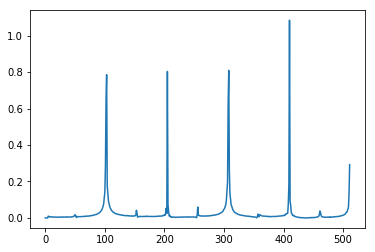

In [145]:
plt.plot(range(0,len(ma)),ma)
plt.show()

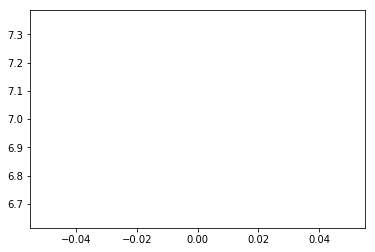

In [96]:
plt.plot(np.arange(0,len(data)),np.array(data))

plt.show()

In [142]:
data_all=data+data2

0.0 0.0
0.64 676.3199999999999
1.28 328.59999999999997
1.92 37.400000000000034
2.56 0.43999999999999995
3.2 0.0
3.84 0.0
4.48 0.0
5.12 0.0
5.76 0.0
6.4 0.0
7.04 0.040000000000000036
7.68 0.6799999999999997
8.32 0.6799999999999997
8.96 0.03999999999999915
9.6 0.0
10.24 0.0
10.88 0.0
11.52 0.0
12.16 0.16000000000000014
12.8 0.8000000000000007
13.44 1.0
14.08 1.0
14.72 1.0
15.36 0.6400000000000006
16.0 0.0
16.64 0.0
17.28 0.0
17.92 0.0
18.56 0.0
19.2 0.0
19.84 0.0
20.48 0.0
21.12 0.0
21.76 0.0
22.4 0.0
23.04 0.1599999999999966
23.68 2.719999999999999
24.32 4.960000000000001
24.96 6.880000000000003
25.6 3.999999999999993
26.24 1.7600000000000016
26.88 1.120000000000001
27.52 0.4800000000000004
28.16 0.16000000000000014
28.8 0.8000000000000007
29.44 1.0
30.08 0.9200000000000017
30.72 0.28000000000000114
31.36 0.0
32.0 0.0
32.64 0.6400000000000006
33.28 1.0
33.92 1.0
34.56 1.0
35.2 1.2000000000000028
35.84 1.8400000000000034
36.48 1.0400000000000063
37.12 0.11999999999999744
37.76 0.75999999

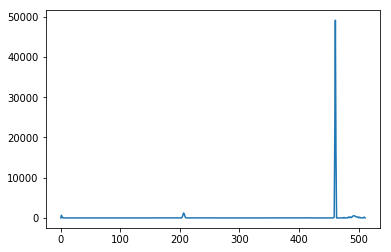

In [143]:
f_mag=[]
for j in range(0,512):
    X=j*512*2/1600
    
    result= (X-np.floor(X) )*data_all[np.int32( np.ceil(X))]+(np.ceil(X)-X )*data_all[np.int32( np.floor(X))]
    print(str(X )+' '+str(result))
    f_mag.append( result)
plt.plot(np.arange(0,len(f_mag)),np.array(f_mag))
plt.show()

In [80]:
data/44

[44048,
 6407,
 256,
 512,
 768,
 1024,
 256,
 512,
 1024,
 768,
 256,
 512,
 768,
 256,
 1024,
 1024,
 512,
 1024,
 256,
 512,
 0,
 512,
 512,
 256,
 768,
 512,
 512,
 1024,
 1536,
 256,
 1024,
 2048,
 1536,
 1024,
 256,
 256,
 256,
 1536,
 1280,
 512,
 768,
 256,
 512,
 0,
 1280,
 1024,
 1024,
 512,
 2048,
 2560,
 1792,
 2048,
 1280,
 256,
 256,
 1024,
 768,
 256,
 768,
 512,
 256,
 512,
 0,
 0,
 0,
 256,
 512,
 256,
 1280,
 0,
 1280,
 768,
 256,
 512,
 1280,
 2304,
 768,
 0,
 2048,
 768,
 512,
 1280,
 2560,
 1024,
 768,
 3072,
 1536,
 768,
 2048,
 1280,
 2048,
 1792,
 3328,
 1536,
 1024,
 0,
 512,
 1280,
 1024,
 2304,
 768,
 1792,
 1536,
 1536,
 768,
 512,
 1024,
 2304,
 2560,
 3840,
 2816,
 2816,
 1280,
 1280,
 2304,
 4096,
 1280,
 4352,
 2048,
 2048,
 5632,
 4096,
 4608,
 5376,
 3584,
 1024,
 3328,
 3072,
 5632,
 768,
 3840,
 1536,
 1024,
 768,
 3072,
 2048,
 2560,
 2816,
 9984,
 5888,
 3072,
 3072,
 1280,
 3840,
 6144,
 768,
 4352,
 4864,
 8704,
 6912,
 1792,
 4096,
 3328,
 7680,

In [140]:
len(data)+len(data2)

527

# 第二个包

Package: 0
Address: 1
Code: 3
Size: 200
Serial Number: 3
Header Length: 0




Package: 1
Address: 1
Code: 3
Size: 200
Serial Number: 4
Header Length: 0




Package: 2
Address: 1
Code: 3
Size: 54
Serial Number: 5
Header Length: 0


462


0.0 0.0
0.64 32863.159999999996
1.28 36866.159999999996
1.92 4096.240000000003
2.56 0.0
3.2 0.0
3.84 0.0
4.48 0.0
5.12 0.0
5.76 0.0
6.4 0.0
7.04 0.0
7.68 0.0
8.32 0.0
8.96 0.0
9.6 153.5999999999999
10.24 194.55999999999995
10.88 30.7199999999998
11.52 0.0
12.16 0.0
12.8 0.0
13.44 0.0
14.08 20.480000000000018
14.72 184.32000000000016
15.36 163.84000000000015
16.0 0.0
16.64 163.84000000000015
17.28 184.3199999999997
17.92 20.479999999999563
18.56 143.35999999999967
19.2 307.1999999999998
19.84 471.03999999999996
20.48 512.0
21.12 512.0
21.76 512.0
22.4 409.60000000000036
23.04 256.0
23.68 256.0
24.32 256.0
24.96 256.0
25.6 102.39999999999964
26.24 61.4399999999996
26.88 225.27999999999975
27.52 122.88000000000011
28.16 0.0
28.8 0.0
29.44 0.0
30.08 0.0
30.

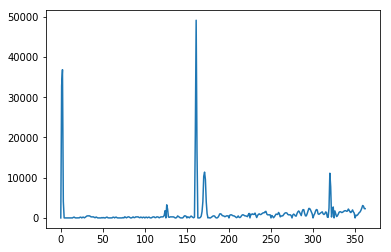

In [133]:
strEncoded=b'AQPIAwAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAQAAAAEAAAABAAIAAgACAAEAAQABAAAAAQAAAAAAAAAAAAEAAAAAAAEAAAAAAAAAAAABAAAAAQAAAAAAAAAAAAAAAQABAAAAAQABAAAAAAABAAAAAQABAAEAAAABAAAAAQAAAAEAAAABAAAAAAABAAEAAAABAAEAAAABAAEAAQADAA4ADAAAAAEAAQABAAEAAAAAAAIAAQAAAAAAAAACAAIAAQABAAAAAgABAAABA8gEAAAAAAAAAgAKADAAKAAGAAEAAAAAAAEAAgACAAAAAAABAAQABAACAAIAAQACAAIAAgADAAMAAgACAAEAAAACAAAAAQADAAMAAgACAAEABAAFAAMABAADAAUAAAADAAQAAwAEAAUABQAHAAMAAwADAAMAAgAAAAIABAADAAYAAQACAAIABAAFAAUAAwADAAMAAQAEAAMAAQAFAAcABQACAAgACAACAAIABgAKAAgABQACAAMABwAJAAMABAAFAAYAAwAEAAcAAAEDNgUAAAsACgAFAAEAAwAGAAYABQAGAAcABwAGAAkABgAFAAgABQAEAAIAAwAFAAYACQANAAkAAA=='
strDecoded=base64.b64decode(strEncoded)
len(strDecoded)
data2=[]
offset=0
for i in range(0,3):
    print("Package: "+str(i))
    print("Address: "+ str(  struct.unpack("B",strDecoded[offset+0:offset+1])[0]    ))
    print("Code: "+ str(  struct.unpack("B",strDecoded[offset+1:offset+2])[0]    ))
    size=struct.unpack("B",strDecoded[offset+2:offset+3])[0]
    print("Size: "+ str(  struct.unpack("B",strDecoded[offset+2:offset+3])[0]    ))
    print("Serial Number: "+ str(  struct.unpack("B",strDecoded[offset+3:offset+4])[0]    ))
    print("Header Length: "+ str(  struct.unpack("B",strDecoded[offset+4:offset+5])[0]    ))
    offset_old=offset
    print('\n')
    offset+=3+size
    j=offset_old
    while j<offset:
        
        #print(j)
        try:
            byte16=struct.unpack(">H",strDecoded[j:j+2])[0]
        except:
            print(j)
        j+=2
        data2.append(byte16)
    print('\n')
#plt.plot(np.arange(0,len(data)),np.array(data))
f1=[]
f_max=np.int32(len(data2)*800/512)
for j in range(0,f_max-1):
    X=j*512*2/1600
    
    result= (X-np.floor(X) )*data2[np.int32( np.ceil(X))]+(np.ceil(X)-X )*data2[np.int32( np.floor(X))]
    print(str(X )+' '+str(result))
    f1.append( result)
plt.plot(np.arange(0,len(f1)),np.array(f1))
plt.show()


In [136]:
len(data)

993

In [134]:
len(data2)

233

In [ ]:
st

In [33]:
def ByteToHex( byteStr ):
    """
    Convert a byte string to it's hex string representation e.g. for output.
    """
    
    # Uses list comprehension which is a fractionally faster implementation than
    # the alternative, more readable, implementation below
    #   
    #    hex = []
    #    for aChar in byteStr:
    #        hex.append( "%02X " % ord( aChar ) )
    #
    #    return ''.join( hex ).strip()        

    return ''.join( [ "%02X " % ord( x ) for x in byteStr ] ).strip()

In [36]:
import struct

In [43]:
strDecoded[8:9]

b'@'

In [45]:
byte=struct.unpack('B',strDecoded[2:3]);byte

(200,)

In [34]:
ByteToHex(strDecoded)

TypeError: ord() expected string of length 1, but int found

In [32]:
strDecoded

b'\x01\x03\xc8\x00\x06\x02\x00\x06@\x03\x00\xb6\x10\x1d\x07\x02\x00\x05\x00\x08\x00\t\x00\x04\x00\x02\x00\x02\x00\x07\x00\x03\x00\x04\x00\x03\x00\x06\x00\x04\x00\x05\x00\x06\x00\x03\x00\x08\x00\x04\x00\x06\x00\x00\x00\x03\x00\x04\x00\x04\x00\x08\x00\x06\x00\x02\x00\x04\x00\x03\x00\x05\x00\x07\x00\x06\x00\x0b\x00\x03\x00\x04\x00\n\x00\x01\x00\x08\x00\x04\x00\x05\x00\x03\x00\x03\x00\x01\x00\x03\x00\x05\x00\x07\x00\x05\x00\x05\x00\x01\x00\x03\x00\x05\x00\x03\x00\t\x00\x05\x00\x06\x00\x03\x00\x07\x00\x05\x00\x04\x00\t\x00\x06\x00\x02\x00\x03\x00\x02\x00\x07\x00\t\x00\x04\x00\x07\x00\x03\x00\n\x00\t\x00\x06\x00\x02\x00\x01\x00\x08\x00\t\x00\x07\x00\x05\x00\x08\x00\t\x00\x07\x00\x05\x00\x06\x00\x0e\x00\n\x00\x04\x00\x0f\x00\x13\x00\x0c\x00\x11\x00\r\x00\x10\x00\x12\x00\x1a\x00\x00\x00\x01\x03\xc8\x01\x00\x14\x00\t\x00\x10\x00\x0f\x00\x08\x00\x1a\x00\x11\x00\x08\x00\x04\x00\x16\x00\x0b\x00\x13\x00\x11\x00\x0c\x00\x0b\x00\x07\x00\x13\x00\x04\x00\x10\x00\x07\x00\x1a\x00\x14\x00\x01\x00#\x00&\x0